In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def display(img):
    fig = plt.figure(figsize = (8,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
img = cv2.imread('C:/users/markp/Documents/computer vision/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/pennies.jpg')

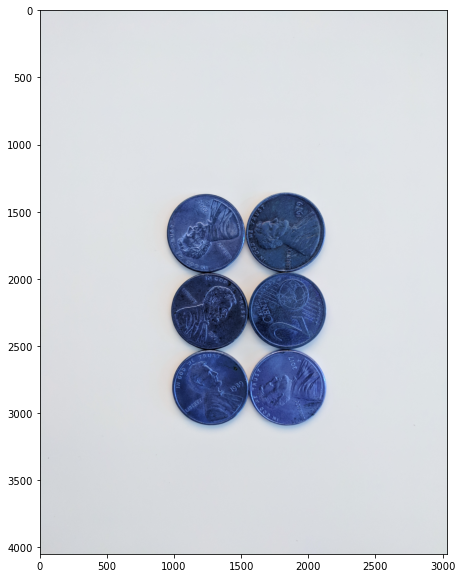

In [4]:
display(img)

# Obective is segment this image in six different parts, so that computer can recognise this image has 6 coins. 
# we can do it by watershed algorithm.
# But first we apply common approach to see weather its working or not

## Common approach is:
### 1. median blur the image
### 2. convert to gray scale
### 3. Now apply binary thresholding
### 4. Find contours

## Blurring

In [5]:
blur = cv2.medianBlur(img,25)

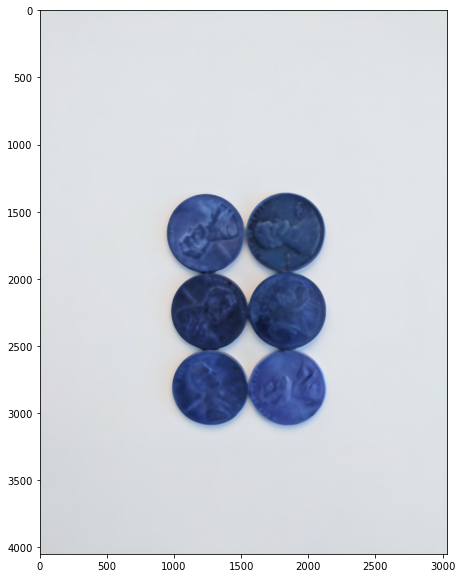

In [6]:
display(blur)

In [7]:
gray_img = cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)

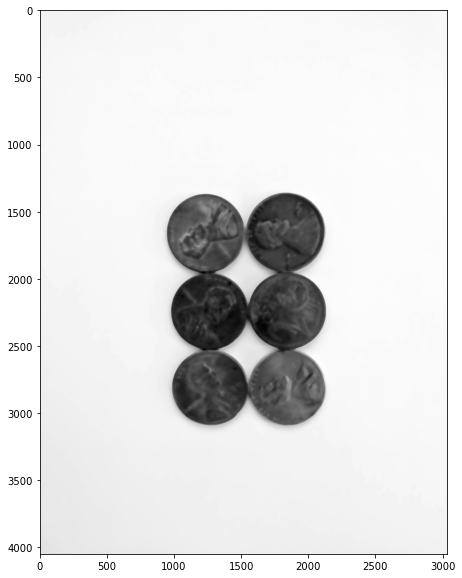

In [8]:
display(gray_img)

## Thresholding

In [9]:
thresh , thresh_img = cv2.threshold(gray_img.copy(),150,255,cv2.THRESH_BINARY_INV)

In [10]:
thresh

150.0

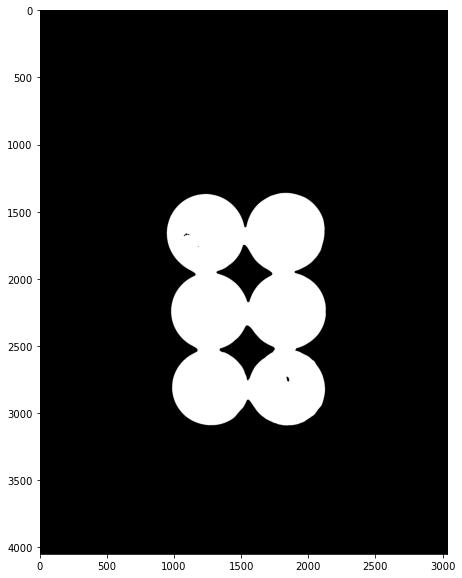

In [11]:
display(thresh_img)

## contour detection

In [12]:
contours , hierarchy = cv2.findContours(thresh_img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [13]:
#contours

In [14]:
hierarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [ 4,  2, -1,  0],
        [ 5,  3, -1,  0],
        [ 6,  4, -1,  0],
        [-1,  5, -1,  0]]], dtype=int32)

In [15]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img,contours,i,255,8)

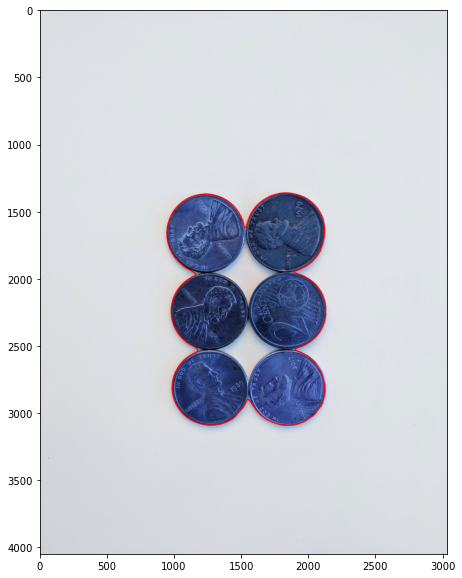

In [16]:
display(img)

## As we can see that the common approach is drwaing contour only outside which means it treat its like a single object

# 

# Now we will apply watershed algorithm manually

In [17]:
img = cv2.imread('C:/users/markp/Documents/computer vision/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/pennies.jpg')

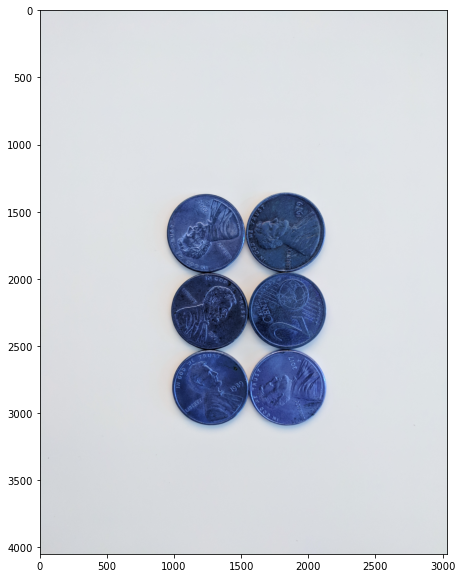

In [18]:
display(img)

## median blur

In [19]:
blur_img = cv2.medianBlur(img,35)

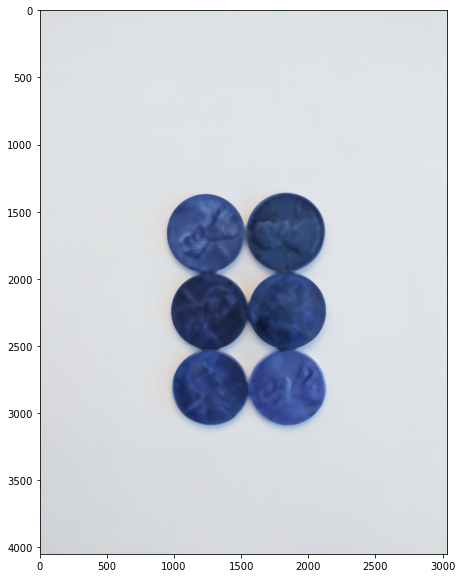

In [20]:
display(blur_img)

## convert to gray scale

In [21]:
gray_img = cv2.cvtColor(blur_img,cv2.COLOR_BGR2GRAY)

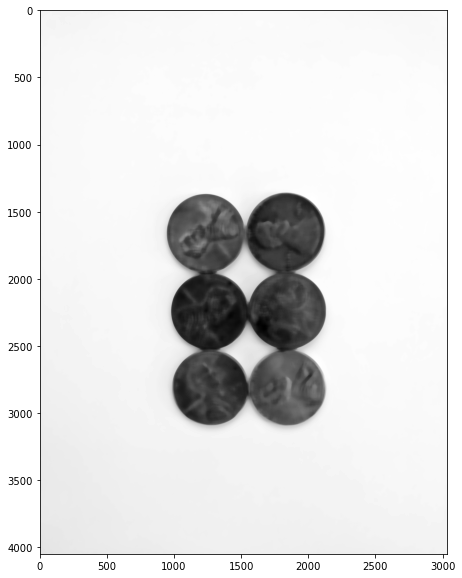

In [22]:
display(gray_img)

## Thresholding to get binary image

In [23]:
thresh, thresh_img = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

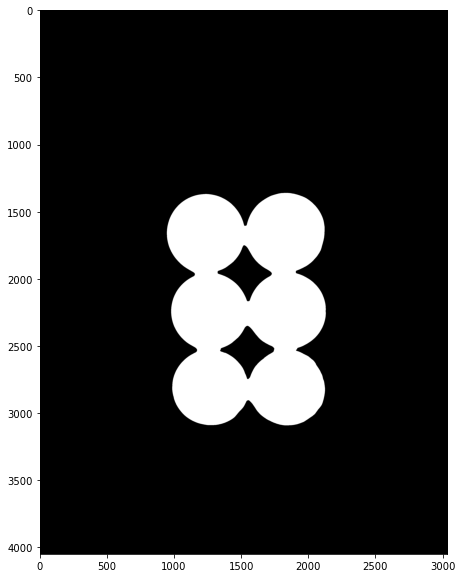

In [24]:
display(thresh_img)

## Noise removal

In [25]:
kernel = np.ones((4,4),np.uint8)

In [26]:
opening = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN,kernel) # opening is used to remove background noise i.e., any white spots
                                                               # on black background

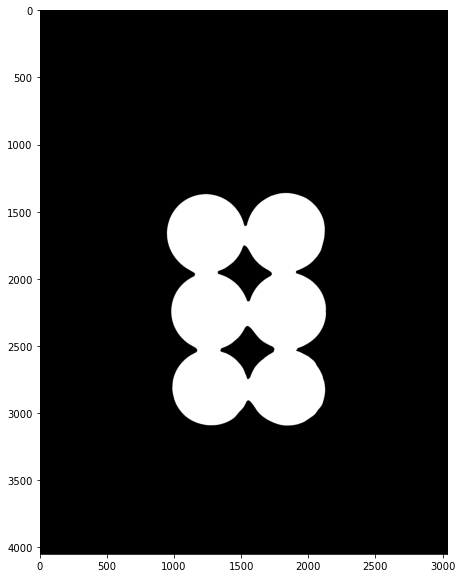

In [27]:
display(opening)

### Now find sure background area

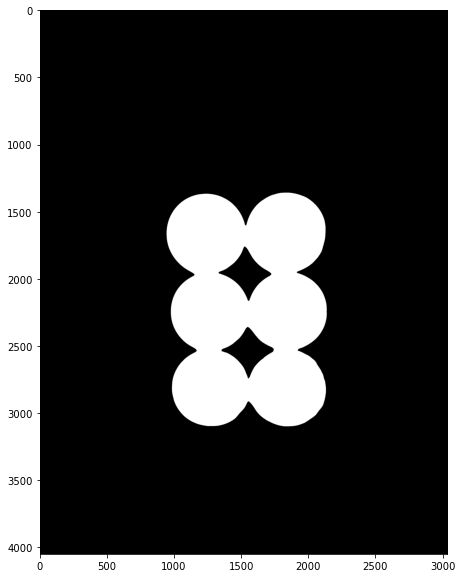

In [28]:
sure_bg = cv2.dilate(opening,kernel,iterations = 3)
display(sure_bg)

### Find sure foreground area
##### we can find sure foreground area by performing errosion operation. But here obects i.e., coins are connected so we cannot apply errosion.
##### Now we will find sure foreground area by using distance transform

In [29]:
#display(cv2.erode(thresh_img,kernel,iterations = 8)) , we cannot apply erosion as coins are connected

### Distance transform to find sure foreground area

In [30]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
thresh, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

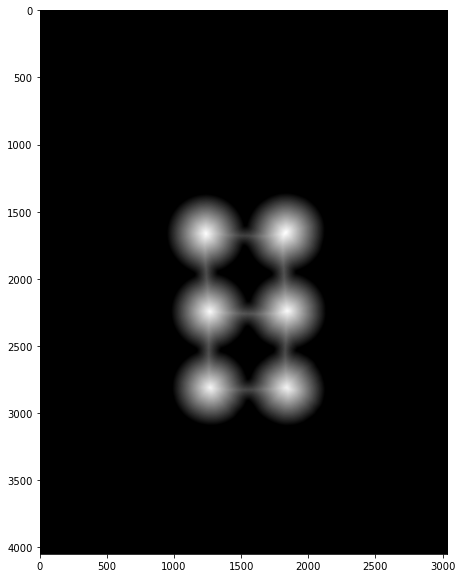

In [31]:
display(dist_transform)

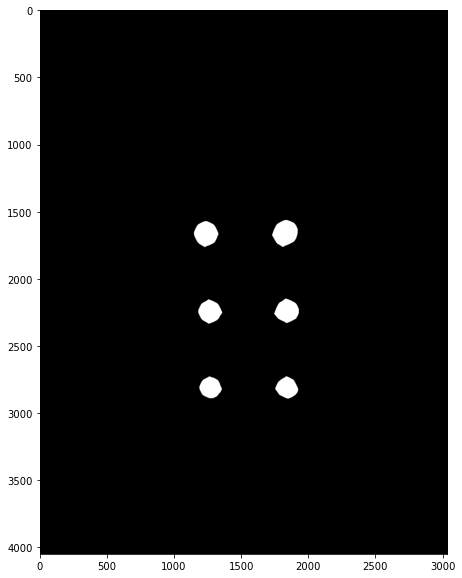

In [32]:
display(sure_fg)

## Now we will find unknown area in which we don't know weather it is sure_bg or sure_fg.
### This unknown area is considered as watershed or border or barriers which separate two objects.

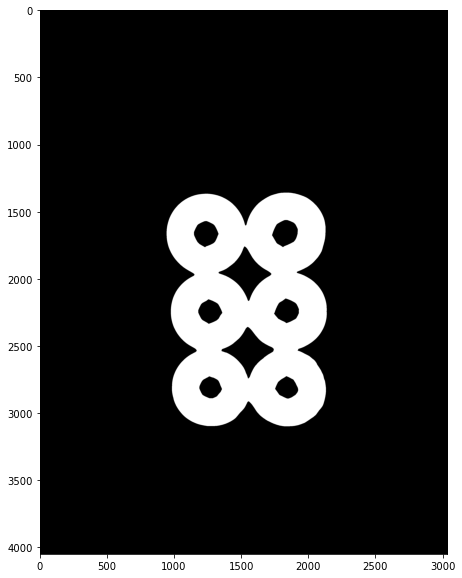

In [33]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
display(unknown)

# Now we will create markers
#### So we create marker (it is an array of same size as that of original image, but with int32 datatype) and label the regions inside it. The regions we know for sure (whether foreground or background) are labelled with any positive integers, but different integers, and the area we don't know for sure are just left as zero. For this we use cv.connectedComponents(). It labels background of the image with 0, then other objects are labelled with integers starting from 1.

In [34]:
ret, markers = cv2.connectedComponents(sure_fg)

In [35]:
#display(markers)

In [36]:
# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

In [37]:
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [41]:
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

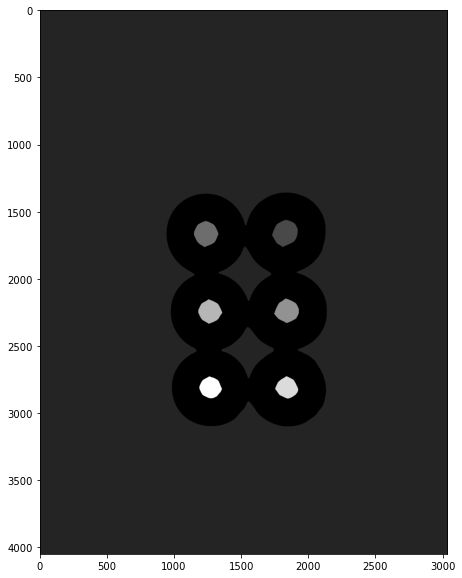

In [38]:
display(markers)

## Apply watershed algorithms

In [48]:
markers = cv2.watershed(img,markers)

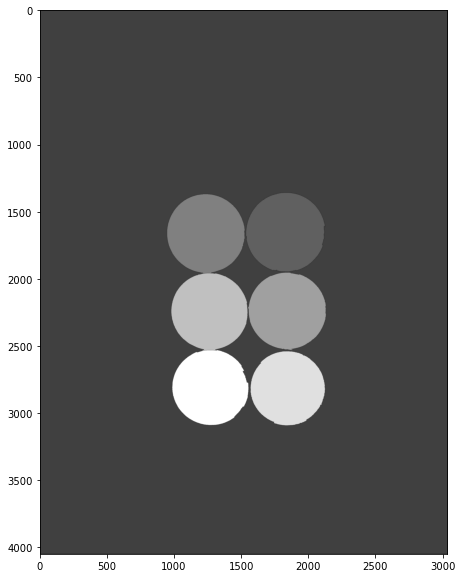

In [50]:
display(markers)   

## Find Contours

In [51]:
contours, hierarchy = cv2.findContours(markers,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [56]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img,contours,i,(255,0,0),5)

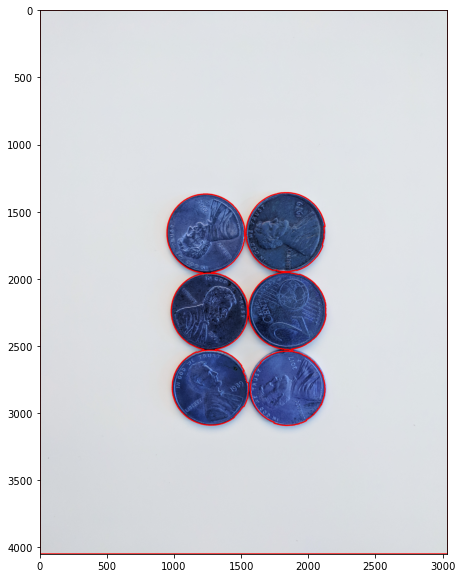

In [57]:
display(img)